In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## 0. 교차표 (pd.crosstab)

- 범주와 범주를 비교하기 위해선 먼저 교차표를 만들어야 한다.

In [3]:
# 두 범주별 빈도수를 교차표로 만들어 보기.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


- pd.crosstab(행, 열, normalize=)
- 값들을 0과 1사이의 비율로 변환.

In [4]:
# 열을 기준으로 합계를 1로 만들고, 비율을 계산
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


In [5]:
# 행을 기준으로 합계를 1로 만들고, 비율을 계산
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.271930,0.087719,0.640351


In [6]:
# 전체 셀을 기준으로 합계를 1로 만들고, 비율을 계산
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


## 1. 시각화

- 100% Stacked Bar
- Mosaic

- Pclass --> Survived

- 100% Stacked Bar
    - 먼저 crosstab으로 집계
    - .plot.bar(stacked = True)
    - 전체 평균선 : plt.axhline()
    - 비율만 비교하므로 양에 대한 비교는 할 수 없다.

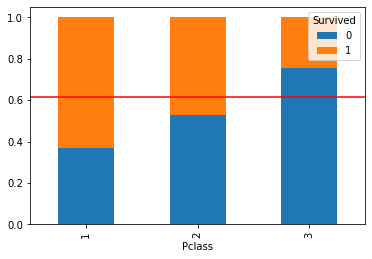

In [7]:
# 집계
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
temp.plot.bar(stacked = True)

# 수평선
plt.axhline(1 - titanic['Survived'].mean(), color = 'r')
plt.show()

- Mosaic Plot
    - mosaic(dataframe, [feature, target])

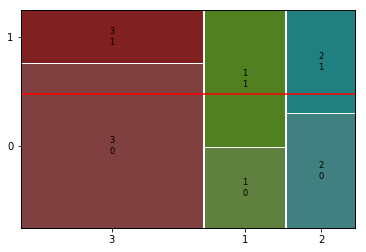

In [8]:
mosaic(titanic, ['Pclass', 'Survived'])
plt.axhline(1 - titanic['Survived'].mean(), color = 'r')
plt.show()

- x축 길이는 각 객실등급별 승객비율.
- 그 중 3등급 객실에 대해서 보면, y축의 길이는 3등급 객실 승객 중 사망, 생존 비율을 의미.

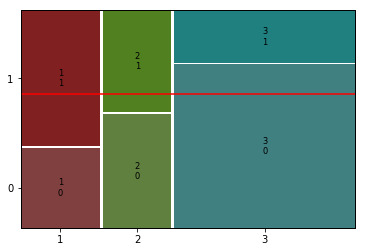

In [9]:
# 저장된 값 순서대로.
# 사이 간격은 gap 옵션.
mosaic(titanic.sort_values(['Pclass', 'Survived']), [ 'Pclass','Survived'], gap = 0.01)
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

## 2. 수치화 : 카이제곱검정

- 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지 수치화.

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

- 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    - 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    - 보통, 자유도의 2 ~ 3배 보다 크면, 차이가 있다고 봄.
        - 범주형 변수의 자유도 : 범주의 수 - 1
        
- x 변수의 자유도 * y 변수의 자유도
- ex) Pclass -> Survived
    - Pclass : 범주가 3개, Survived : 2개
    - (3 - 1) * (2 - 1) = 2
    - 그러므로, 2의 2 ~ 3배인 4 ~ 6보다 카이제곱 통계량이 크면, 차이가 있다고 볼 수 있음.

In [12]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------


In [13]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]
